# UTP PPM 2024
---------------
# KNN

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Salma Adzra Fathina

NIM   : 225150207111042

Kelas : PPM - F

# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset

Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

Link alternatif: https://drive.google.com/file/d/1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV/view

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV' -O winequality-red.csv

--2024-04-06 08:52:17--  https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV
Resolving docs.google.com (docs.google.com)... 173.194.197.139, 173.194.197.102, 173.194.197.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download [following]
--2024-04-06 08:52:17--  https://drive.usercontent.google.com/download?id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.197.132, 2607:f8b0:4001:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [application/octet-stream]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-

In [ ]:
data = pd.read_csv('winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Data information and check for missing values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu dilakukan imputasi atau metode penanganan nilai yang hilang lainnya.

# Pre-proses Data

Lakukan reduksi data melalui downsampling untuk memperpendek proses pelatihan dan pengujian model.

In [ ]:
# Reduce the number data
def random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=0)
reduced_data = random_sampling(data, 500)

Lakukan normalisasi data kecuali kolom quality sebagai kolom label dengan menggunakan z-score.

In [ ]:
# Z-score normalization except for the quality column
def z_score(data):
    # Exclude the 'quality' column from normalization
    columns_to_normalize = data.columns[:-1]
    # Normalized data initialization
    normalized_data = data.copy()
    for col in columns_to_normalize:
      normalized_data[col] = (data[col] - data[col].mean()) / data[col].std()
    return normalized_data

normalized_data = z_score(reduced_data)
normalized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.478894,-0.316620,0.839736,-0.342617,2.080887,1.247433,0.721623,0.787516,-0.949976,0.669567,0.326500,6
1032,-0.090687,1.829335,-1.382061,1.340176,0.200821,-1.034963,-1.029072,0.968922,0.280060,-0.797104,-0.799686,5
1002,0.490639,-1.420254,0.323039,-0.384686,-0.590786,-0.205001,-0.591398,-0.834468,-0.367327,1.179714,1.171140,7
487,1.130098,0.756357,0.478048,-0.595036,-0.838163,-1.034963,-1.029072,0.787516,-0.949976,-1.498556,-0.424291,6
979,2.292751,-0.439246,1.149754,-0.931594,-0.293934,-1.242453,-1.298410,0.093904,-1.208930,-0.159421,-0.048895,5


# Model

Buatlah sebuah fungsi perhitungan jarak menggunakan rumus Chebyshev, Euclidean, Manhattan yang memiliki parameter data1 dan data2 dalam bentuk float, dan distance_type dalam bentuk string.

In [ ]:
# Distance Function (chebyshev, euclidean, manhattan)

def chebyshev(data1, data2):
  distance_type = np.max(np.abs(data1 - data2))
  return distance_type
def euclidean(data1, data2):
  distance_type = (np.sum(np.square(data1 - data2)))
  return np.sqrt(distance_type)
def manhattan(data1, data2):
  distance_type = np.sum(np.abs(data1 - data2))
  return distance_type


def calculate_distance(data1, data2, distance_type):
    if distance_type == 'chebyshev':
        return chebyshev(data1, data2)
    elif distance_type == 'euclidean':
        return euclidean(data1, data2)
    elif distance_type == 'manhattan':
        return manhattan(data1, data2)
    else:
        return None

Simpan label dataset yang dinormalisasi ke dalam variabel yang disebut "label".

In [ ]:
label = normalized_data[normalized_data.columns[-1]]
label

1109    6
1032    5
1002    7
487     6
979     5
       ..
831     6
1437    5
620     5
465     5
748     6
Name: quality, Length: 500, dtype: int64

Bagi dataset yang dinormalisasi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(normalized_data.iloc[:, :-1], label, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)

(400, 11)
(100, 11)


**memisahkan label yang di prediksi dari data train dan test sudah menggunakan normalized_data.iloc[:, :-1] diatas**

Buatlah sebuah fungsi algoritma KNN untuk melakukan prediksi menggunakan parameter train_data, train_label, test_data, k sebagai bilangan bulat, dan distance_type sebagai string.

In [ ]:
def knn(train_data, train_label, test_data, k, distance_type):
    distances = np.array([calculate_distance(train_data.iloc[x], test_data, distance_type) for x in range(train_data.shape[0])])
    k_indices = distances.argsort()[:k]
    k_labels = train_label.iloc[k_indices].to_numpy()
    counter = Counter(k_labels)
    prediction = counter.most_common(1)[0][0]
    return prediction

def knn_multi(train_data, train_label, test_data, k, distance_type):
    predictions = []
    for i in range(len(test_data)):
        prediction = knn(train_data, train_label, test_data.iloc[i], k, distance_type)
        predictions.append(prediction)
    return predictions

**buat ngetes aja**

In [ ]:
#jarak chebyshev
jarak_chebyshev = knn(train_data, train_label, test_data.iloc[0], k=3, distance_type='chebyshev')
print(jarak_chebyshev)

jarak_chebyshev = knn_multi(train_data, train_label, test_data, k=3, distance_type='chebyshev')
print(jarak_chebyshev)

#jarak euclidean
jarak_euclidean = knn(train_data, train_label, test_data.iloc[0], k=3, distance_type='euclidean')
print(jarak_euclidean)

jarak_euclidean = knn_multi(train_data, train_label, test_data, k=3, distance_type='euclidean')
print(jarak_euclidean)

#jarka manhattan
jarak_manhattan = knn(train_data, train_label, test_data.iloc[0], k=3, distance_type='manhattan')
print(jarak_manhattan)

jarak_manhattan = knn_multi(train_data, train_label, test_data, k=3, distance_type='manhattan')
print(jarak_manhattan)

6
[6, 6, 4, 6, 5, 7, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 5, 5, 3, 6, 5, 6, 6, 5, 6]
6
[6, 5, 4, 6, 5, 7, 6, 8, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 3, 6, 5, 6, 6, 5, 6]
6
[6, 5, 4, 6, 5, 6, 6, 8, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 6, 5, 5, 7, 6, 5, 6, 6, 5, 6]


Temukan nilai k terbaik dengan mengamati hasil akurasi untuk setiap nilai k yang berbeda dan berbagai metode perhitungan jarak yang berbeda.

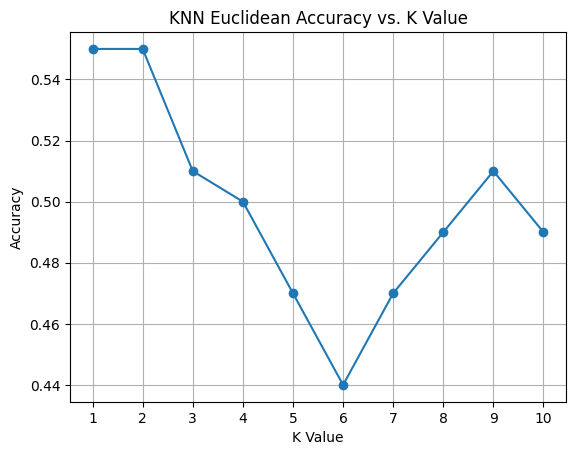

In [ ]:
# Find best k for euclidean KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11)

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, distance_type='euclidean')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Euclidean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**dari 1 sampai 10, k terbaik yang dapat digunakan adalah 1 dan 2**

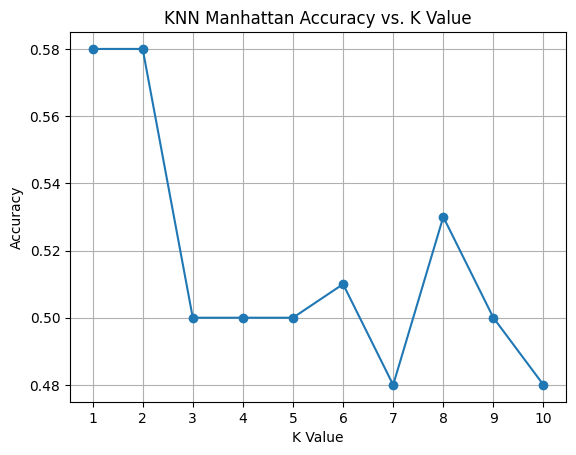

In [ ]:
# Find best k for Manhattan KNN

k_values = []
accuracies = []

k_range = range(1, 11)

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, distance_type='manhattan')
    accuracy = accuracy_score(test_label, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Manhattan Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**dari 1 sampai 10, k terbaik yang dapat digunakan adalah 1 dan 2**

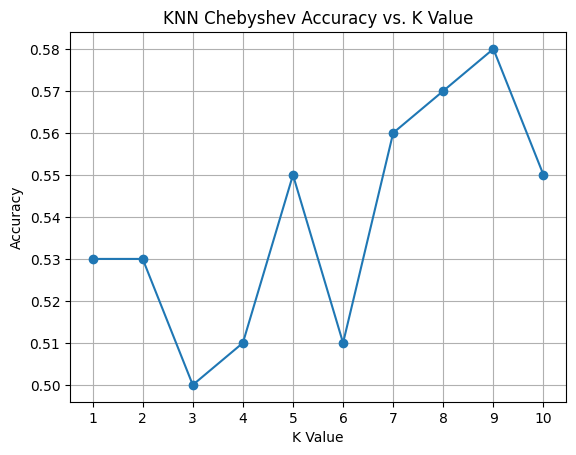

In [ ]:
# Find best k for chebyshev KNN


k_values = []
accuracies = []

k_range = range(1, 11)

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, distance_type='chebyshev')
    accuracy = accuracy_score(test_label, predictions)
    k_values.append(k)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Chebyshev Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**dari 1 sampai 10, k terbaik yang dapat digunakan adalah 9**

# Evaluasi

Cetak hasil akurasi prediksi untuk setiap KNN dengan nilai k terbaik dan rumus perhitungan jarak yang berbeda

In [ ]:
# Predict using euclidean KNN with the best k value
k = [1,2]
for k in k:
    predictions = knn_multi(train_data, train_label, test_data, k, distance_type='euclidean')
    accuracy = accuracy_score(test_label, predictions)
    print("Accuracy:", accuracy)

Accuracy: 0.55
Accuracy: 0.55


In [ ]:
# Predict using manhattan KNN with the best k value
k = [1,2]
for k in k:
    predictions = knn_multi(train_data, train_label, test_data, k, distance_type='manhattan')
    accuracy = accuracy_score(test_label, predictions)
    print("Accuracy:", accuracy)

Accuracy: 0.58
Accuracy: 0.58


In [ ]:
# Predict using chebyshev KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, k, distance_type='chebyshev')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.53


# Kesimpulan

Soal

1. Jelaskan pengaruh k yang rendah ataupun tinggi terhadap akurasi hasil algoritma KNN!
2. Jelaskan pengaruh perbedaan rumus perhitungan jarak yang digunakan terhadap hasil akurasi algoritma KNN!
3. Jelaskan dan sebutkan berapa jumlah k ideal dan apa rumus perhitungan jarak yang menghasilkan akurasi terbaik pada praktikum ini!

Jawaban



1.   jumlah sampel data latih terdekat dengan test_data yang diambil (k) akan menentukan label/kelas yang akan diprediksi  berdasarkan kelas mayoritas dari tiap-k sampel terstbut. Jadi ketika kita mengubah nilai k, maka kita sebenarnya mengubah jumlah tetangga yang dihitung oleh algoritma saat membuat prediksi. Dikarenakan akurasi model dipengaruhi oleh outlier pada data maka apabila k terlalu besar maka model akan rentan terhadap underfitting, dan sebaliknya apabila k terlalu kecil maka akan rentan terhadap overfitting.
2.   Perbedaan rumus untuk menghitung jaraknya disebabkan oleh karakteristik tiap rumus itu sendiri.

*   Pada chebyshev, yang dihitung merupakan jarak maks tiap dimensi. Dikarenakan rumus ini hanya mengukur jarak maks nya, maka jarak ini memberikan akurasi yang lebih rendah dari hasil lainnya, karena perbedaan antara tetangganya yang lebih dekat kurang sensitif.
*   Pada euclidean, yang dihitung merupakan jarak lurus tiap dimensi. Rumus ini adalah rumus untuk mengukur jarak paling umum dan cocok digunakan apabila dataset memiliki fitur yang seragam dan hubungan antara fitur dan labelnya seragam.
*   Pada manhattan, yang dihitung merupakan jarak antara 2 dimensi yang absolut antara koordinat mereka. Dikarenakan rumus ini dapat memberikan hasil yang seimbang tiap dimensi, maka rumus ini memberikan akurasi yang cukup baik.

Pada hasil saya, dapat dilihat juga bahwa hasil akurasi menggunakan rumus manhattan memiliki hasil tertinggi dari rumus lainnya. Sehingga manhattan merupakan rumus yang paling cocok dengan dataset ini. RUmus ini menghasilkan pemilihan tetangga yang baik dan prediksi yang cukup akurat.

3.   Dilihat dari plot diatas, dapat diambil informasi bahwa titik tertinggi pada rumus euclidean dan manhattan terdapat pada k value 1 dan 2 dan pada rumus chebyshev terdapat pada k value 9. Sehingga jumlah K ideal ada 3 yaitu 1, 2 dan 9.

    Untuk rumus perhitungan jarak yang menghasilkan akurasi terbaik adalah manhattan (memiliki akurasi terbaik dari 2 rumus lainnya).

